# Week_4
* 文字探勘

#### 匯入需要的函式庫

In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import itertools as it
import jieba
import re
from func import *

#### 讀取 PDF 檔案，並計算其總頁數

In [2]:
text = readPDF('../../2707 2017 晶華.pdf')
print('Total Pages : ', len(text))

Total Pages :  215


#### 設定要擷取的頁面範圍 (頁數) 以及資料特徵 (字串)

In [3]:
crop = getBetween(text, 91, '重大會計政策', 102, '決策者為董事會。')
print(crop[0:500], '\n......\n', crop[-500:])

重大會計政策之彙總說明編製本合併財務報告所採用之主要會計政策說明如下。除另有說明外，此等政策在所有報導期間一致地適用。(一)遵循聲明本合併財務報告係依據證券發行人財務報告編製準則與金管會認可之國際財務報導準則、國際會計準則、解釋及解釋公告(以下簡稱IFRSs)編製。(二)編製基礎1.除下列重要項目外，本合併財務報告係按歷史成本編製：(1)按公允價值衡量之透過損益按公允價值衡量之金融資產及負債(包括衍生工具)。(2)按退休基金資產減除確定福利義務現值之淨額認列之確定福利負債。2.編製符合IFRSs之財務報告需要使用一些重要會計估計，在應用本集團的會計政策過程中亦需要管理階層運用其判斷，涉及高度判斷或複雜性之項目，或涉及合併財務報告之重大假設及估計之項目，請詳附註五說明。(三)合併基礎1.合併財務報告編製原則(1)本集團將所有子公司納入合併財務報告編製之個體。子公司指受本集團控制之個體（包括結構型個體），當本集團暴露於來自對該個體之參與之變動報酬或對該等變動報酬享有權利，且透過對該個體之權力有能力影響該等報酬時，本集團即控制該個體。子公司自本集團取得控制之日起納入合併財務報告，於喪失控制之 
......
 屬之增額成本以稅後淨額認列為股東權益之減項。買回之股票後續再發行時，所收取之對價扣除任何可直接歸屬之增額成本及所得稅影響後與帳面價值之差額認列為股東權益之調整。~98~(二十九)股利分配分派予本公司股東之股利於股東會決議分派股利時於財務報告認列，分派現金股利認列為負債，分派股票股利則認列為待分配股票股利，並於發行新股基準日時轉列普通股。(三十)收入認列本集團提供餐飲服務、客房住宿、租賃、技術及經營管理等相關服務。收入係正常營業活動中對集團外顧客提供服務已收或應收對價之公允價值，以扣除營業稅之淨額表達。收入於服務提供或商品銷售後、銷貨金額能可靠衡量且未來經濟效益很有可能流入企業時認列。當與所有權相關之重大風險與報酬已移轉予顧客，本集團對商品既不持續參與管理亦未維持有效控制且顧客根據銷售合約接受商品，或有客觀證據顯示所有接受條款均已符合時，商品交付方屬發生。提供勞務之交易結果能可靠估計時，依已提供勞務程度認列收入。(三十一)營運部門本集團營運部門資訊與提供給主要營運決策者之內部管理報告採一致之方式報導。主要營運決策者負責分配資源予營運部門並評估其績效，經辨識本集團之主要

#### 利用 jieba 解析內部部份字組，並輸出

In [4]:
seg_list = jieba.cut(crop[0:500], cut_all=False)
print(" / ".join(seg_list))

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
DEBUG:jieba:Loading model from cache /tmp/jieba.cache
Loading model cost 1.100 seconds.
DEBUG:jieba:Loading model cost 1.100 seconds.
Prefix dict has been built succesfully.
DEBUG:jieba:Prefix dict has been built succesfully.


重大 / 會計 / 政策 / 之 / 彙 / 總 / 說明 / 編 / 製 / 本 / 合 / 併 / 財 / 務 / 報 / 告 / 所 / 採 / 用 / 之 / 主要 / 會計 / 政策 / 說明 / 如下 / 。 / 除 / 另 / 有 / 說 / 明外 / ， / 此等 / 政策 / 在 / 所有 / 報導 / 期間 / 一致 / 地 / 適用 / 。 / ( / 一 / ) / 遵循 / 聲明 / 本合 / 併 / 財務 / 報告 / 係 / 依據 / 證券發 / 行人 / 財務 / 報告 / 編 / 製 / 準 / 則 / 與 / 金 / 管 / 會 / 認 / 可 / 之 / 國 / 際 / 財 / 務 / 報 / 導 / 準 / 則 / 、 / 國際會計 / 準則 / 、 / 解釋 / 及 / 解釋 / 公告 / ( / 以下 / 簡稱 / IFRSs / ) / 編 / 製 / 。 / ( / 二 / ) / 編 / 製 / 基 / 礎 / 1 / . / 除 / 下列 / 重要 / 項目 / 外 / ， / 本合 / 併 / 財務 / 報告 / 係 / 按 / 歷史 / 成本 / 編 / 製 / ： / ( / 1 / ) / 按 / 公允 / 價值 / 衡量 / 之透過 / 損益 / 按 / 公允 / 價值 / 衡量 / 之 / 金融 / 資產及 / 負債 / ( / 包括 / 衍生 / 工具 / ) / 。 / ( / 2 / ) / 按 / 退休 / 基金 / 資產 / 減除 / 確定 / 福利 / 義務 / 現值 / 之淨額 / 認列 / 之 / 確定 / 福利 / 負債 / 。 / 2 / . / 編 / 製 / 符合 / IFRSs / 之 / 財務 / 報告 / 需要 / 使用 / 一些 / 重要 / 會計 / 估計 / ， / 在 / 應用 / 本 / 集團 / 的 / 會計 / 政策 / 過程 / 中 / 亦 / 需要 / 管理 / 階層 / 運用 / 其判斷 / ， / 涉及 / 高度 / 判斷 / 或 / 複 / 雜性 / 之 / 項目 / ， / 或 / 涉及 / 合 / 併 / 財務 / 報告 / 之 / 重大 / 假設 / 及 / 估計 / 之 / 項目 / ， / 請詳 / 附 / 註 / 五 / 說 / 明 / 

#### 設定需要過濾的字詞、符號

In [5]:
stopwords = ['我', '對', '\n', '之', '於', '或', '認列', '為', '按', '係', '後', '及', '與', '以', '時', '該']
puncs_Full = '！？｡＂＃＄％＆＇（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。'
puncs_Half = "!?.#$%&'()*+,-/:;<=>@[]^_{}|~\\\""

#### 建立文字詞頻表

In [6]:
seg_list = jieba.cut(crop, cut_all=False)
seg_list = list(seg_list)
wordDict = {}
for w in seg_list:
    if (w not in stopwords) and (w not in puncs_Full) and (w not in puncs_Half) and (bool(re.match('[^0-9]', w))):
        if w in wordDict:
            wordDict[w] = wordDict[w] + 1
        else:
            wordDict[w] = 1
print('Number of word : ', len(wordDict))

Number of word :  1133


#### 合併特殊字組

In [7]:
def dictcombine(dictionary, word_1, word_2):
    freq_1 = dictionary.pop(word_1)
    freq_2 = dictionary.pop(word_2)
    if freq_1 > freq_2:
        dictionary[word_1 + word_2] = freq_2;
        dictionary[word_1] = freq_1 - freq_2;
    elif freq_2 > freq_1:
        dictionary[word_1 + word_2] = freq_1;
        dictionary[word_2] = freq_2 - freq_1;
    else:
        dictionary[word_1 + word_2] = freq_1;
    return dictionary

In [8]:
wordDict = dictcombine(wordDict, '公允', '價值')

#### 列印部份文字詞頻內容

In [9]:
times = 100
for i in wordDict.items():
    print(i, end = '')
    if times==0:
        break
    else:
        times = times - 1

('因折現', 2)('所產生', 3)('價值', 12)('集團', 14)('錯誤', 1)('礎', 1)('併', 14)('預期將', 2)('之事項', 1)('舊外', 1)('採永續', 1)('達美樂則', 1)('應先', 1)('理由', 1)('受到限制', 1)('遵循', 1)('藉由', 2)('增加', 1)('承租人', 2)('員', 1)('前述', 2)('雖然', 1)('扣除', 10)('之市', 1)('該損', 1)('不影響', 1)('辦理', 6)('自對', 1)('持有人', 2)('至', 3)('藝術品', 1)('財產', 1)('帳款', 5)('有', 12)('提', 1)('市場', 4)('變動', 10)('待', 1)('狀況', 2)('建地', 1)('減項', 3)('嗣', 2)('人', 3)('其餘營業', 1)('付狀況', 1)('並', 3)('之會計', 2)('金及', 1)('很', 5)('現值', 3)('策者', 3)('的', 3)('日起', 2)('內實', 1)('減少能', 1)('收益', 2)('計畫', 7)('並於有關', 1)('採', 3)('解釋', 2)('計利潤', 1)('產生', 6)('未依', 1)('之淨額', 2)('無表', 1)('三', 1)('定期', 4)('虧', 1)('則認', 5)('股東', 4)('外', 5)('向', 1)('稅負債', 1)('該義務', 3)('法', 4)('轉者則', 1)('違約', 2)('成定', 1)('除列', 2)('銷貨金額', 1)('次', 1)('RegentResidencesLimited', 1)('住宿', 1)('非關', 2)('滿足營', 1)('之資產', 1)('支付', 5)('之調', 1)('無盈餘', 1)('運用', 1)('一些', 1)('許權', 1)('下', 5)('時將', 2)('動及', 1)('準備', 3)('比', 1)('時間', 1)('遞', 1)('估列', 2)('所計算', 1)

#### 繪製文字雲

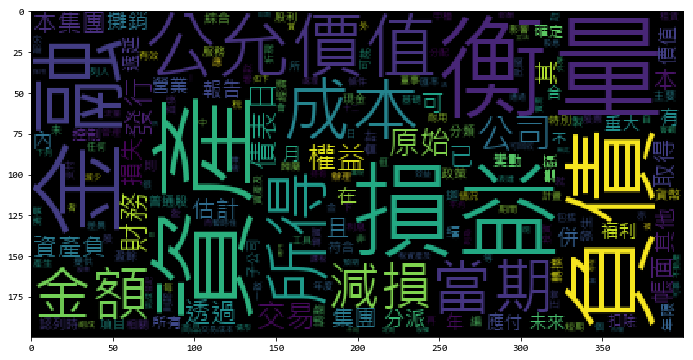

In [10]:
font = r"/home/dongdong/.local/share/fonts/msjh.ttf"
wordcloud = WordCloud(font_path=font)
wordcloud.fit_words(wordDict)
plt.figure(figsize=(15,6))
plt.imshow(wordcloud)

#### 依照出現頻率排序後，輸出部份資料

In [11]:
sort = sorted(wordDict.items(), key=lambda x: x[1], reverse = True)
sort[0:20]

[('衡量', 52),
 ('資產', 52),
 ('損益', 43),
 ('負債', 41),
 ('金融', 41),
 ('公允價值', 39),
 ('成本', 33),
 ('所得', 33),
 ('當期', 26),
 ('金額', 26),
 ('減損', 23),
 ('公司', 22),
 ('原始', 21),
 ('財務', 20),
 ('發行', 19),
 ('權益', 18),
 ('交易', 17),
 ('債表日', 17),
 ('透過', 16),
 ('本集團', 16)]

#### 繪製前十名資料長條圖

(array([ 0., 10., 20., 30., 40., 50., 60.]),
 <a list of 7 Text yticklabel objects>)

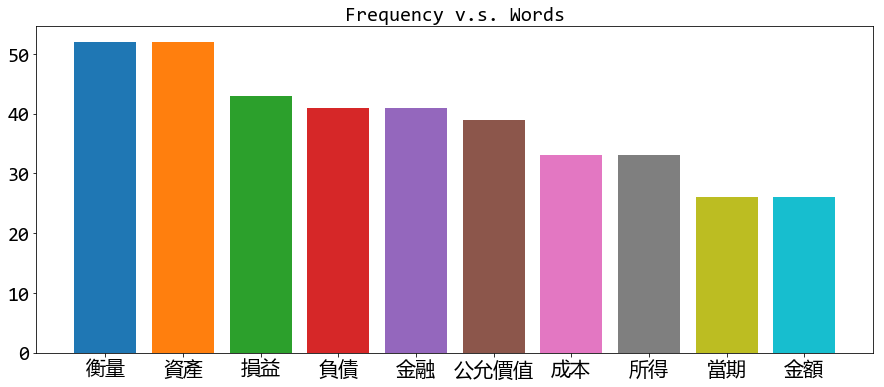

In [12]:
plt.figure(figsize=(15,6))
for i in range(10):
    plt.bar(sort[i][0], sort[i][1])
plt.title('Frequency v.s. Words', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)